<a href="https://colab.research.google.com/github/Anuhyamudda/PRODIGY-DS-TASK2/blob/main/DS_TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**loading dataset**

In [1]:
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Display the first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**data cleaning**

In [2]:
# Check for missing values
df.isnull().sum()

# Fill missing 'Age' values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column since it has too many missing values
df.drop(columns=['Cabin'], inplace=True)

# Verify there are no missing values left
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**correct datatypes**

In [3]:
# Convert 'Sex' and 'Embarked' to categorical data types
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

# Check the data types
df.dtypes


PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
dtype: object

**Exploratory Data Analysis (EDA)**

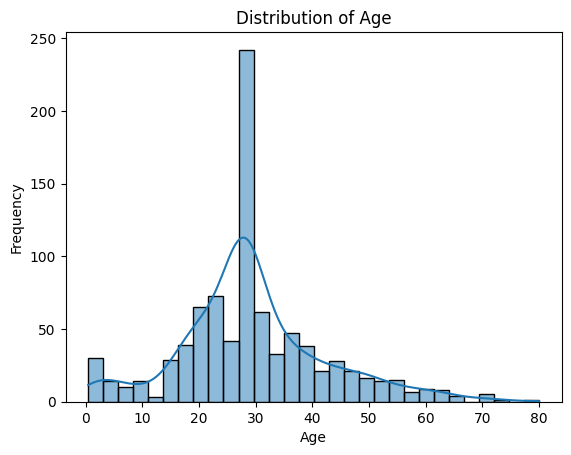

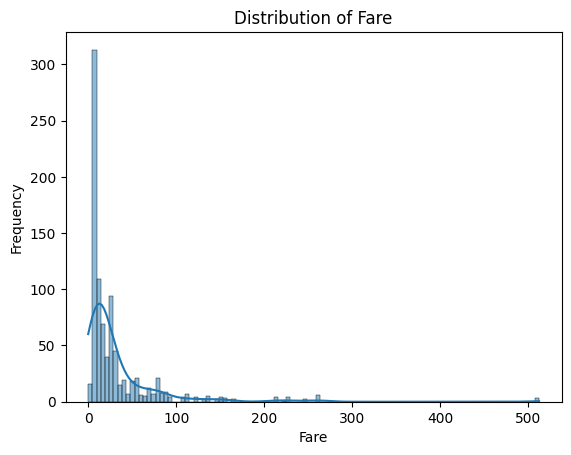

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Age
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Fare
sns.histplot(df['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


**Explore Relationships Between Variables**

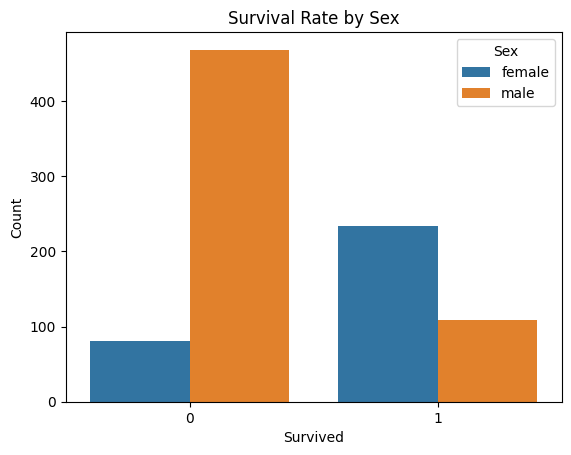

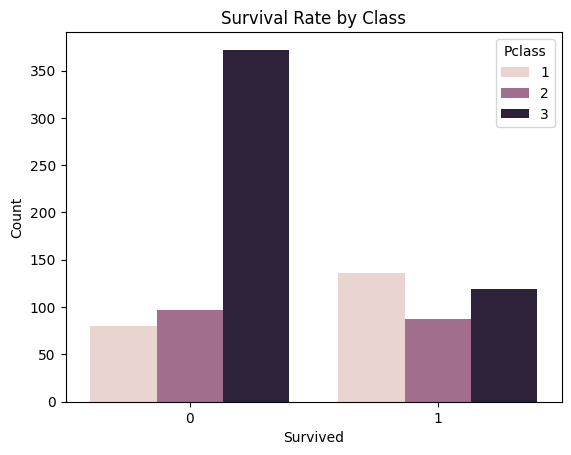

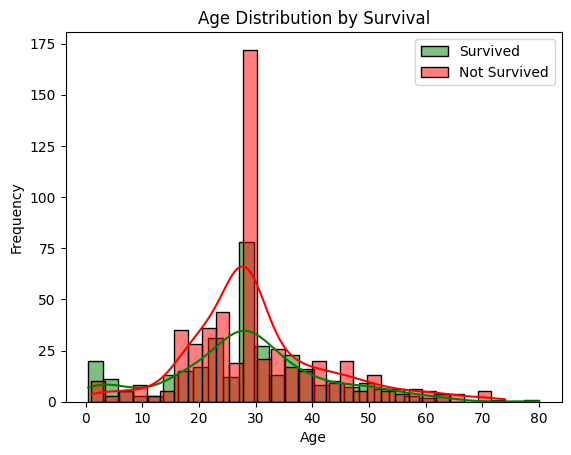

In [5]:
# Survival rate by sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Rate by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Survival rate by class
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Rate by Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Age distribution by survival
sns.histplot(df[df['Survived'] == 1]['Age'], kde=True, label='Survived', color='g', bins=30)
sns.histplot(df[df['Survived'] == 0]['Age'], kde=True, label='Not Survived', color='r', bins=30)
plt.legend()
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**Identify Patterns and Trends**

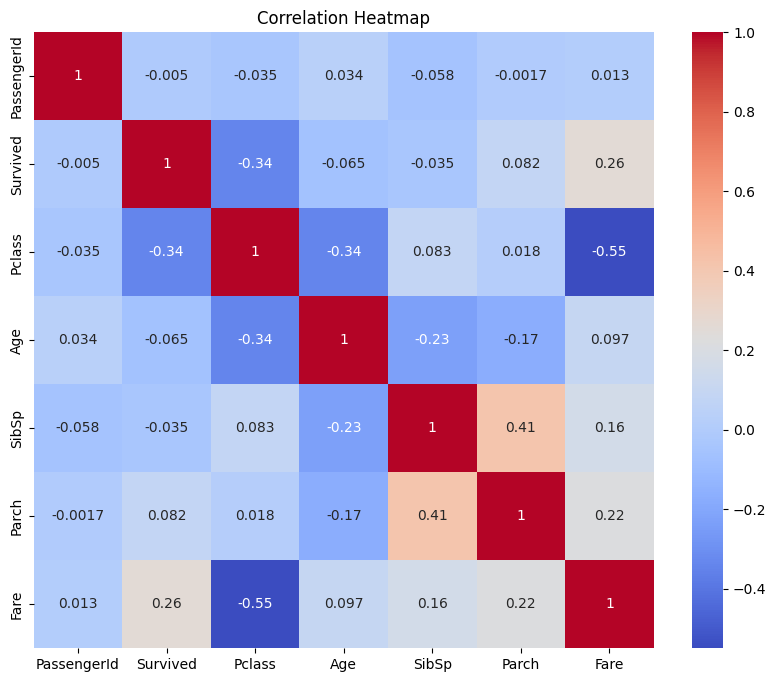

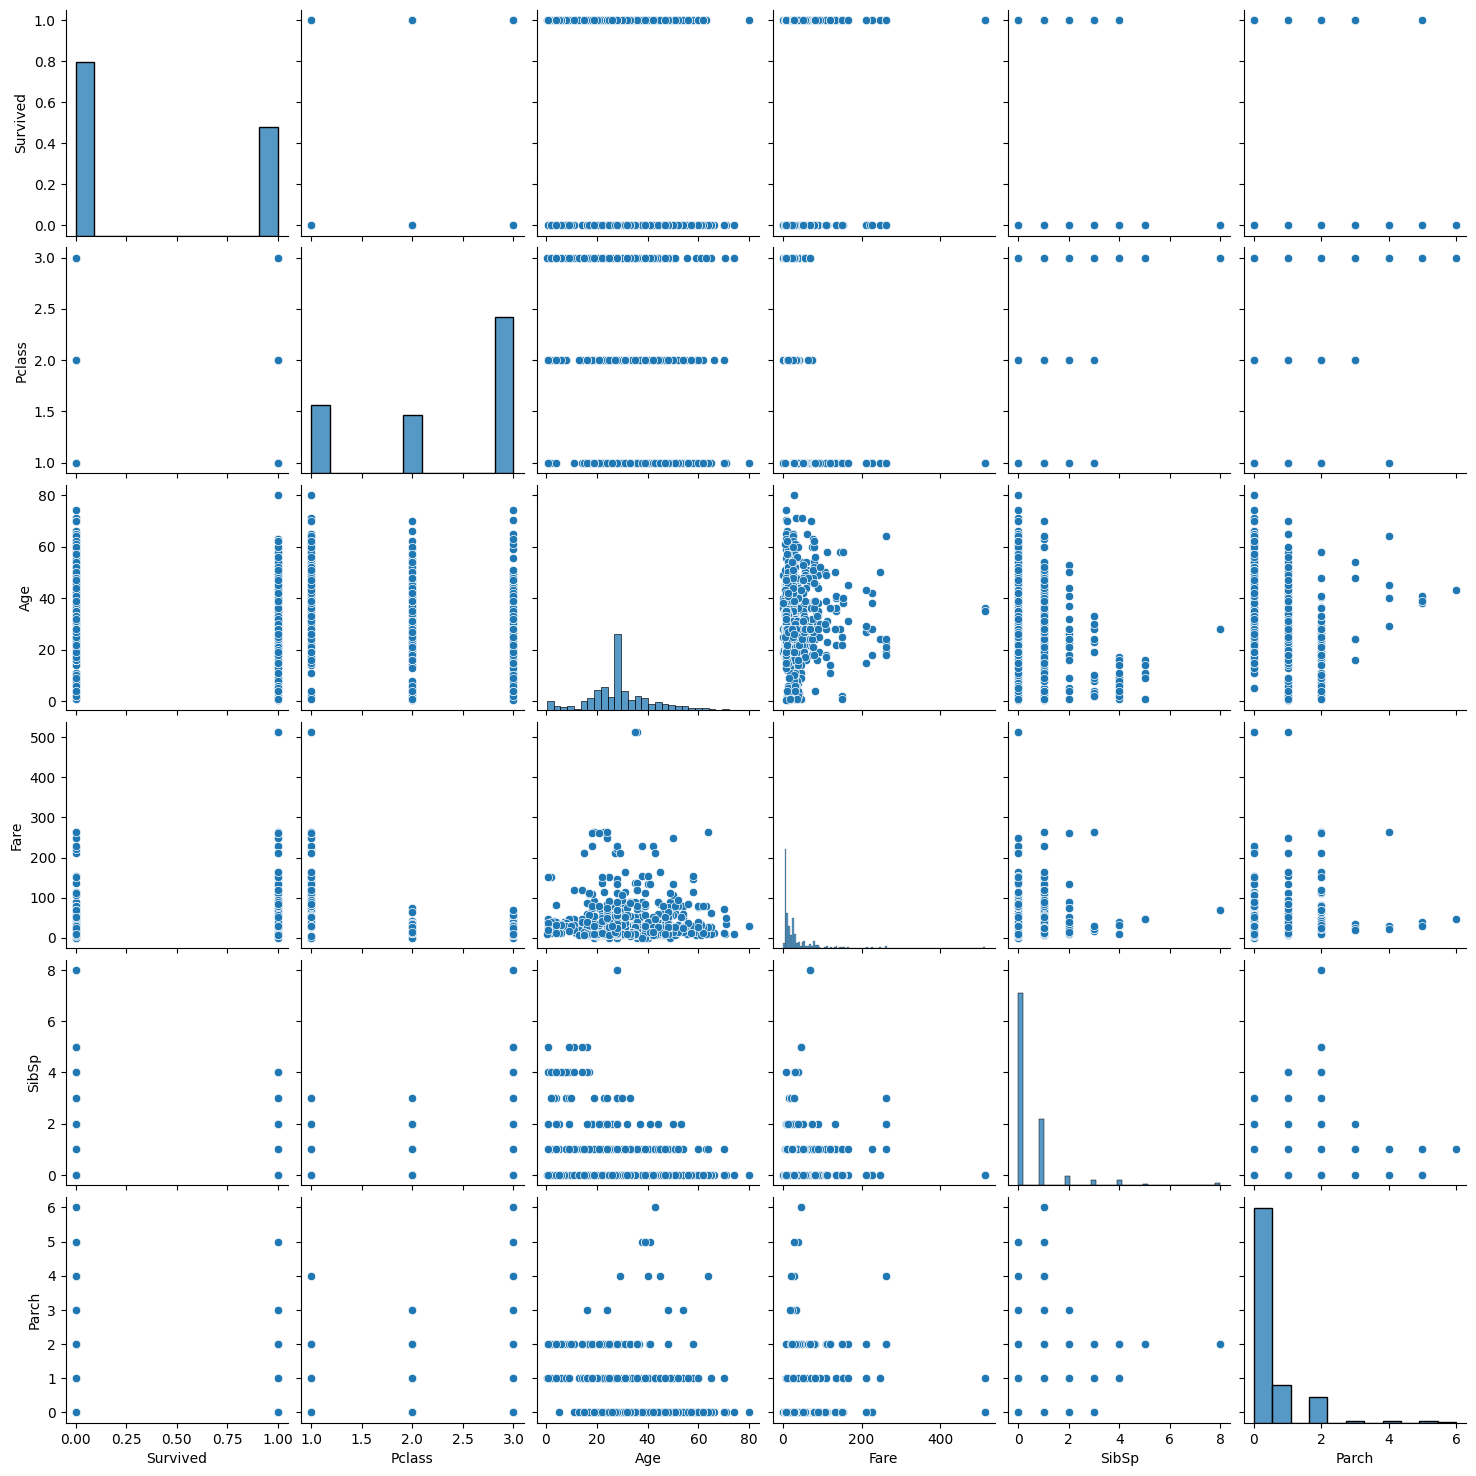

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Fill missing 'Age' values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column since it has too many missing values
df.drop(columns=['Cabin'], inplace=True)

# Convert 'Sex' and 'Embarked' to categorical data types
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for selected features
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']])
plt.show()

